# Анализ графов в Python
Работа с графами в питоне на примере библиотеки NetworkX.



In [17]:
import networkx as nx

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Пример создания простого графа:

In [2]:
# Создаём заготовку графа, в которую будут добавляться вершины и рёбра.
g = nx.Graph()

Добавление вершин:

In [3]:
# Вершину графа можно называть как строкой, так и числом.
g.add_node(1)
g.add_node('n')

# Добавление нескольких вершин сразу.
g.add_nodes_from([2, 3])

Добавление рёбер:

In [5]:
# Указываем две вершины, которые надо соединить.
g.add_edge(1, 'n')

# Добавление нескольких рёбер между указанными вершинами.
g.add_edges_from([(1, 2), (1, 3)])

# Добавление сразу двух вершин.
# Создаются и новые вершины, и ребро между ними!
g.add_edge('a', 'b', weight=0.1)
g.add_edge('b', 'c', weight=1.5)
g.add_edge('a', 'c', weight=1)
g.add_edge('c', 'd', weight=0.2)
g.add_edge('c', 153, weight=1.2)

Визуализация (при повторном запуске ячейки картинка может меняться):

Graph nodes: [1, 'n', 2, 3, 'a', 'b', 'c', 'd', 153]


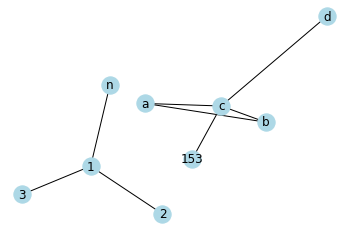

In [8]:
nx.draw_networkx(g, node_color='lightblue')
plt.axis('off')

print('Graph nodes:', g.nodes())

Вывод кратчайшего (или минимизирующего затраты) пути от одной вершины до другой:

In [9]:
# Без учёта весов.
print(nx.shortest_path(g, 'b', 'd'))

# С учётом весов: теперь за переход по каждому ребру вносится плата.
print(nx.shortest_path(g, 'b', 'd', weight='weight'))

['b', 'c', 'd']
['b', 'a', 'c', 'd']


Точно так же, как ребру приписывался численный параметр `weight`, вершине можно приписывать любые характеристики:

In [10]:
g.add_node(
    'node',
    date='06.05.2018',
    any_name='some information'
)
g.nodes['node']

{'date': '06.05.2018', 'any_name': 'some information'}

Т.е. каждый узел графа можно воспринимать как словарь `dict` с произвольными ключами и значениями.

Фактически весь граф это просто словарь, где ключ -- номер вершины, значение -- набор вершин, соседних к ней:

In [11]:
g.adj

AdjacencyView({1: {'n': {}, 2: {}, 3: {}}, 'n': {1: {}}, 2: {1: {}}, 3: {1: {}}, 'a': {'b': {'weight': 0.1}, 'c': {'weight': 1}}, 'b': {'a': {'weight': 0.1}, 'c': {'weight': 1.5}}, 'c': {'b': {'weight': 1.5}, 'a': {'weight': 1}, 'd': {'weight': 0.2}, 153: {'weight': 1.2}}, 'd': {'c': {'weight': 0.2}}, 153: {'c': {'weight': 1.2}}, 'node': {}})

In [12]:
g['c']

AtlasView({'b': {'weight': 1.5}, 'a': {'weight': 1}, 'd': {'weight': 0.2}, 153: {'weight': 1.2}})

Можно вывести и другое традиционное представление графа в виде матрицы смежности:

In [13]:
nx.adjacency_matrix(g).todense()

matrix([[0. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0.1, 1. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.1, 0. , 1.5, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 1. , 1.5, 0. , 0.2, 1.2, 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 1.2, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

Получение числа вершин графа:

In [14]:
g.number_of_nodes()

10

In [15]:
len(g)

10

Числа рёбер:

In [16]:
g.number_of_edges()

8

Совокупная информация:

In [17]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 8
Average degree:   1.6000


При работе с графами часто бывает полезным получить доступ ко всем вершинам / рёбрам, что позволяет сделать метод `.nodes()` / `.edges()`:

In [18]:
g.nodes(data=True)

NodeDataView({1: {}, 'n': {}, 2: {}, 3: {}, 'a': {}, 'b': {}, 'c': {}, 'd': {}, 153: {}, 'node': {'date': '06.05.2018', 'any_name': 'some information'}})

In [19]:
g.edges(data=True)

EdgeDataView([(1, 'n', {}), (1, 2, {}), (1, 3, {}), ('a', 'b', {'weight': 0.1}), ('a', 'c', {'weight': 1}), ('b', 'c', {'weight': 1.5}), ('c', 'd', {'weight': 0.2}), ('c', 153, {'weight': 1.2})])

In [20]:
for node in g.nodes():
    print(node, g.degree(node))

1 3
n 1
2 1
3 1
a 2
b 2
c 4
d 1
153 1
node 0


## Реальные данные

Считаем данные о станциях московского метрополитена в 2014 году:

In [38]:
# Формат : две станции записаны в одной строке, если между ними есть перегон.
# Создать/найти csv файл с описанием связи между станциями метрополитена Москвы

metro_data = pd.read_csv("out.csv")

metro_data.head()

,Start,End
0,Сокольническая_Бульвар-Рокоссовского,Центральное-Кольцо_Бульвар-Рокоссовского
1,Сокольническая_Бульвар-Рокоссовского,Сокольническая_Черкизовская
2,Сокольническая_Черкизовская,Центральное-Кольцо_Локомотив
3,Сокольническая_Черкизовская,Сокольническая_Преображенская-площадь
4,Сокольническая_Преображенская-площадь,Сокольническая_Сокольники


Общее число станций:

In [39]:
len(metro_data['Start'].unique())

317

Загрузим данные в граф из подготовленной таблицы:

- вершинами будут названия станций
- ребро между двумя станциями проводится, если между станциями есть перегон

In [40]:
metro_graph = nx.from_pandas_edgelist(metro_data, source='Start', target='End')

# Указываем, что направление перегона между станциями нас не интересует.
# (как правило, можем поехать в обе стороны)
metro_graph = nx.to_undirected(metro_graph)

print(nx.info(metro_graph))

Name: 
Type: Graph
Number of nodes: 330
Number of edges: 426
Average degree:   2.5818


Нарисуем граф и сохраним его во внешний файл (изменение размера картинки и сохранение делается средствами matplotlib'а):

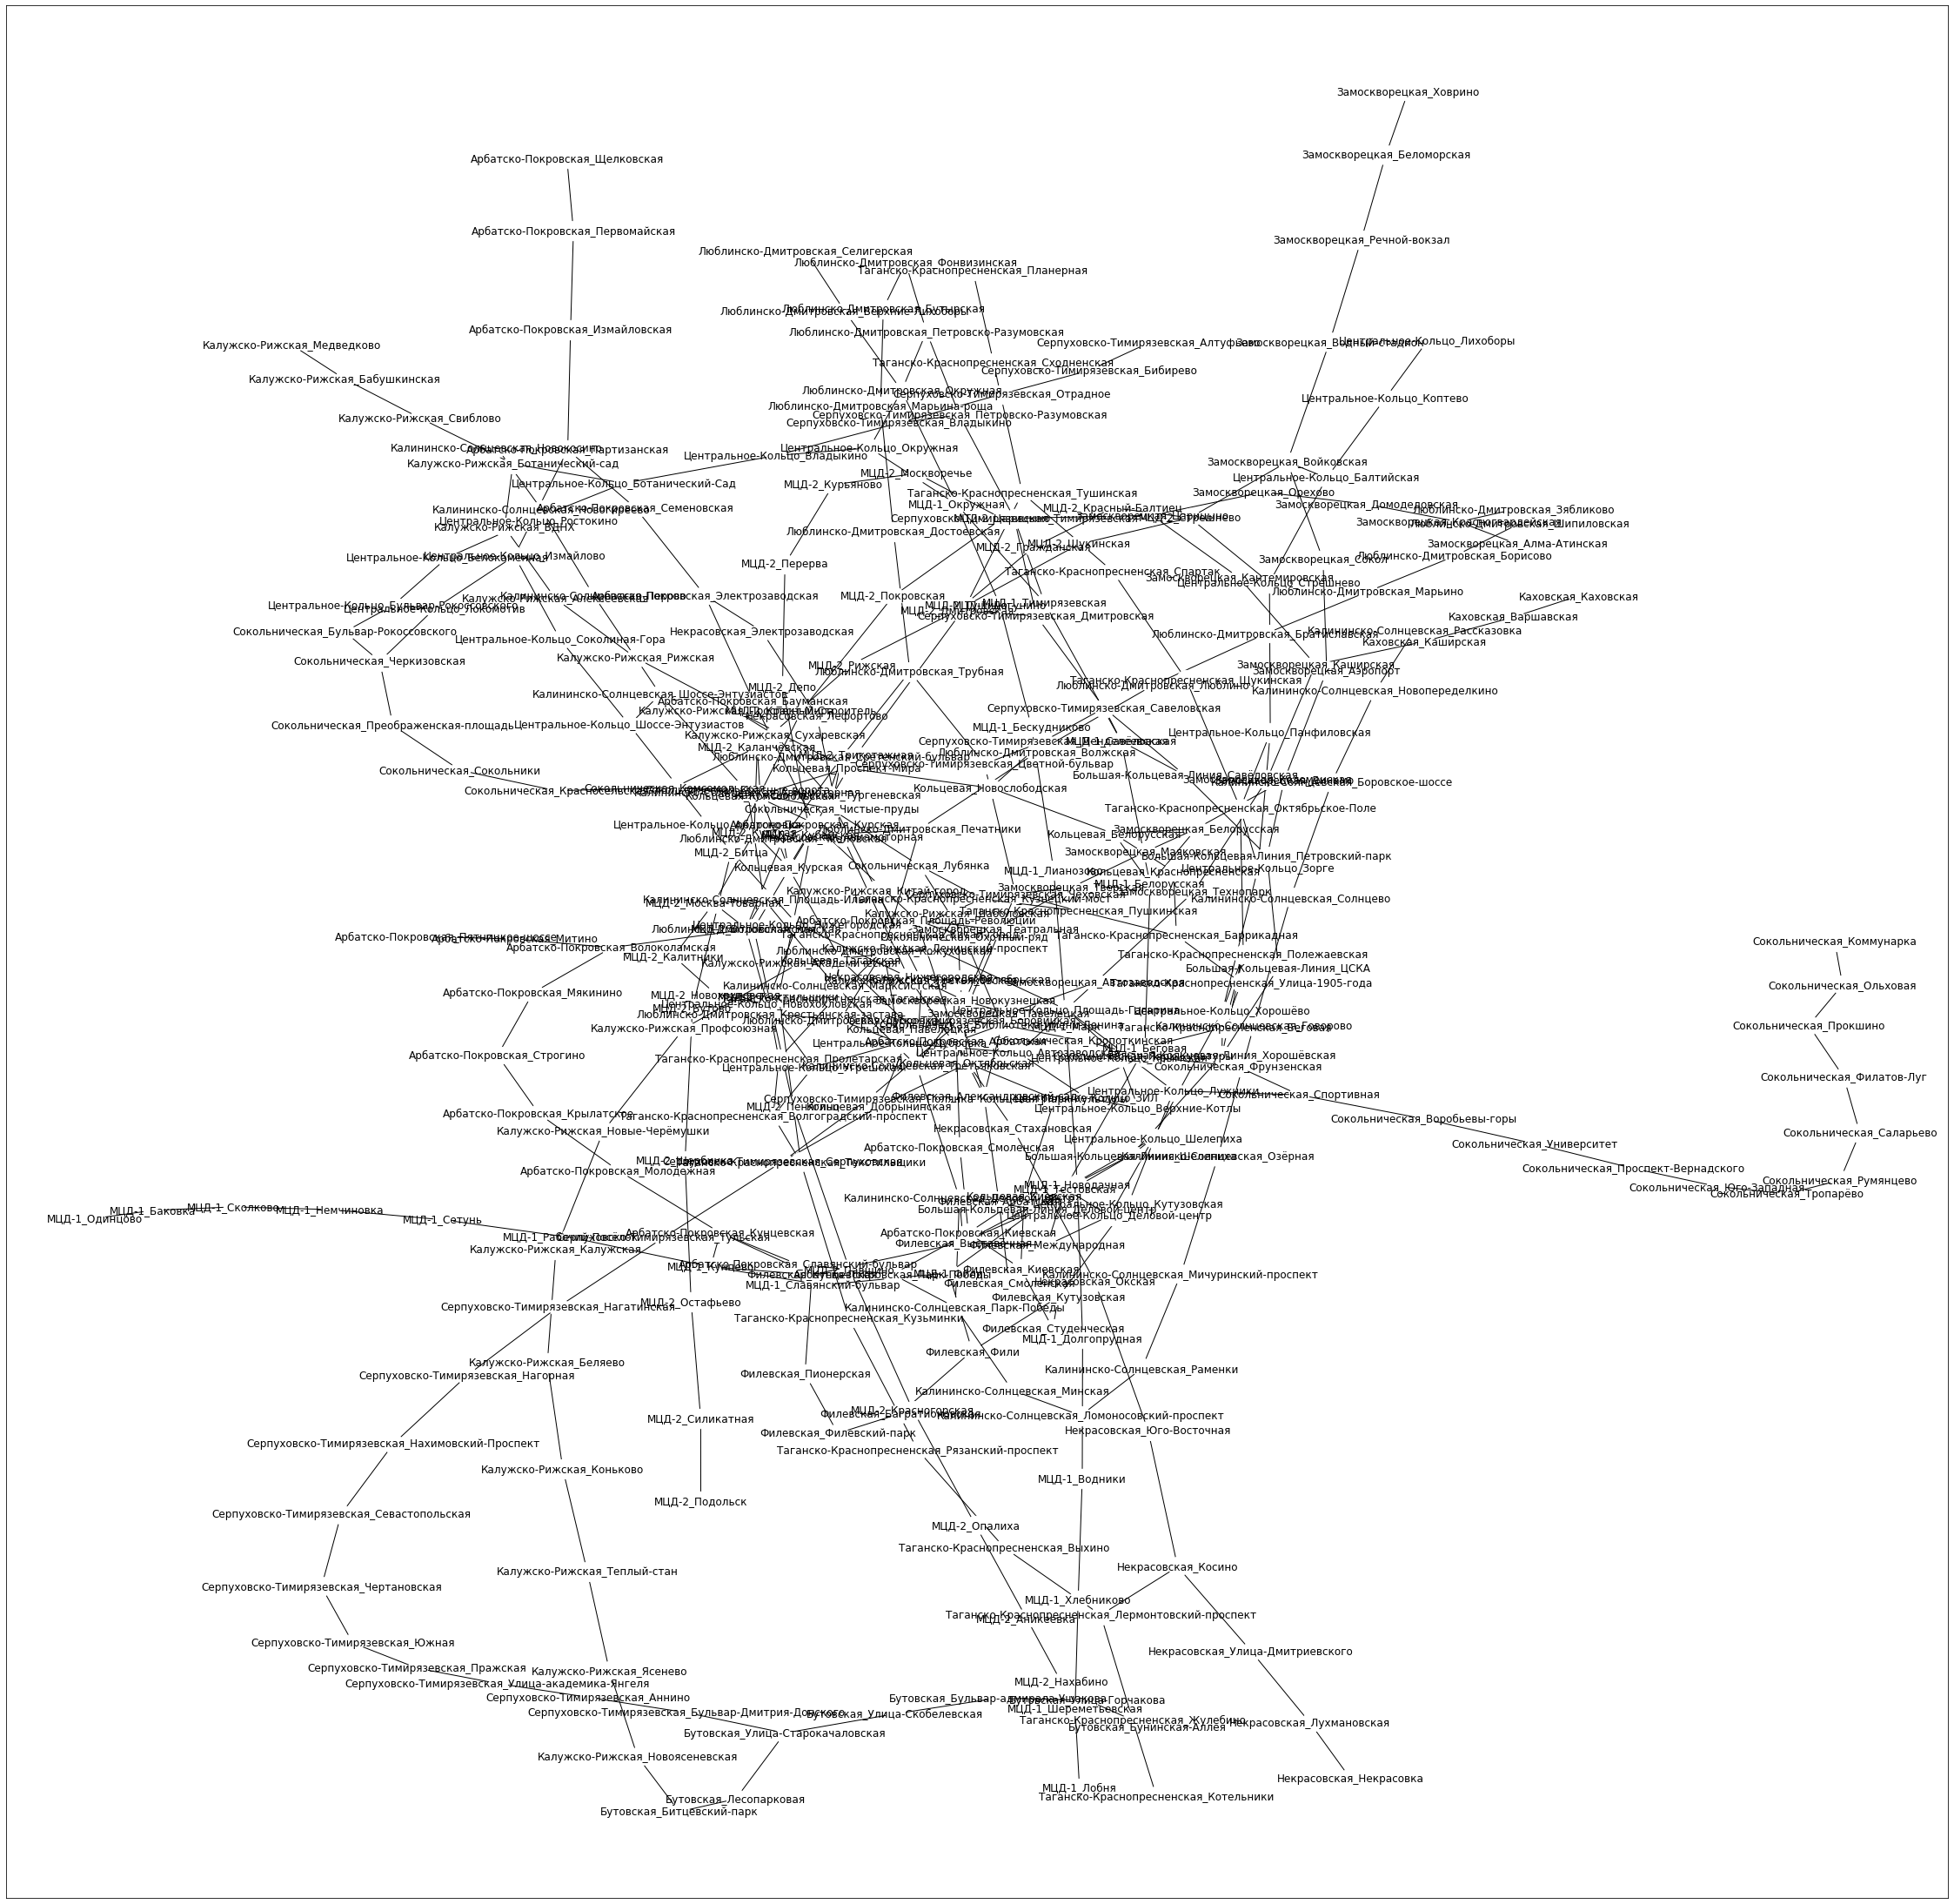

In [41]:
plt.figure(figsize=(40, 40)) 

# Можно поэкспериментировать со способом отрисовки: помимо draw_networkx есть такие:
# draw_circular, draw_spectral, draw_random, etc.
nx.draw_networkx(metro_graph, with_labels=True, node_color='white', node_size=500)

plt.savefig('metro_2014.png', bbox_inches='tight')

Все степени вершин доступны в поле `.degree`, которое похоже по структуре на словарь из пар Имя_вершины: Степень_вершины. Чтобы можно было работать, как со словарём, достаточно навесить преобразование `dict()`:

In [42]:
dict(metro_graph.degree)

{'Сокольническая_Бульвар-Рокоссовского': 2,
 'Центральное-Кольцо_Бульвар-Рокоссовского': 3,
 'Сокольническая_Черкизовская': 3,
 'Центральное-Кольцо_Локомотив': 3,
 'Сокольническая_Преображенская-площадь': 2,
 'Сокольническая_Сокольники': 2,
 'Сокольническая_Красносельская': 2,
 'Сокольническая_Комсомольская': 4,
 'Кольцевая_Комсомольская': 4,
 'МЦД-2_Каланчёвская': 4,
 'Сокольническая_Красные-ворота': 2,
 'Сокольническая_Чистые-пруды': 4,
 'Люблинско-Дмитровская_Сретенский-бульвар': 4,
 'Калужско-Рижская_Тургеневская': 4,
 'Сокольническая_Лубянка': 3,
 'Таганско-Краснопресненская_Кузнецкий-мост': 3,
 'Сокольническая_Охотный-ряд': 4,
 'Арбатско-Покровская_Площадь-Революции': 4,
 'Замоскворецкая_Театральная': 4,
 'Сокольническая_Библиотека-имени-Ленина': 5,
 'Серпуховско-Тимирязевская_Боровицкая': 5,
 'Филевская_Александровский-сад': 4,
 'Арбатско-Покровская_Арбатская': 5,
 'Сокольническая_Кропоткинская': 2,
 'Сокольническая_Парк-Культуры': 3,
 'Кольцевая_Парк-Культуры': 3,
 'Сокольничес

Постройте гистограмму степеней вершин. Подпишите оси и название графика.

Text(0, 0.5, 'Степень')

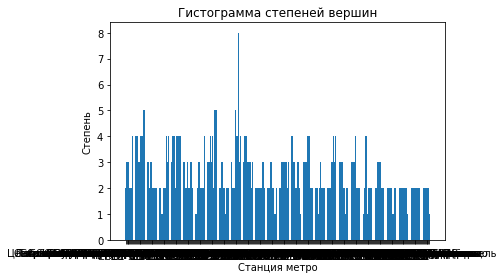

In [43]:
plt.bar(dict(metro_graph.degree).keys(), dict(metro_graph.degree).values())
plt.title('Гистограмма степеней вершин')
plt.xlabel('Станция метро')
plt.ylabel('Степень')

Почему наибольшее число вершин имеет степень $2$?

Выведите станцию, которая соединена с наибольшим числом станций (т.е. вершина станции имеет наибольшую степень). Для этого понадобится пройтись циклом по всем парам вершина-степень и запомнить пару с максимальной степенью.

In [44]:
xres=('unknown',-1)
for r in metro_graph.degree:
    if (xres[1] < r[1]):
        xres=r

xres

('МЦД-1_Тестовская', 8)

С помощью `pandas` выведите станции, на которые можно попасть напрямую от найденной (т.е. те, которые соединены с ней):

In [45]:
metro_data[(metro_data['Start'] == xres[0])]

,Start,End
459,МЦД-1_Тестовская,Центральное-Кольцо_Шелепиха
460,МЦД-1_Тестовская,Центральное-Кольцо_Деловой-центр
461,МЦД-1_Тестовская,Большая-Кольцевая-Линия_Шелепиха
462,МЦД-1_Тестовская,Большая-Кольцевая-Линия_Деловой-центр
463,МЦД-1_Тестовская,Филевская_Выставочная
464,МЦД-1_Тестовская,Филевская_Международная
465,МЦД-1_Тестовская,МЦД-1_Беговая


Библиотека NetworkX позволяет найти кратчайший путь между вершинами, по которому можно судить об их взаимном расположении:

In [46]:
nx.shortest_path(metro_graph, 'Сокольническая_Библиотека-имени-Ленина', 'Серпуховско-Тимирязевская_Боровицкая')

['Сокольническая_Библиотека-имени-Ленина',
 'Серпуховско-Тимирязевская_Боровицкая']

In [47]:
nx.shortest_path(metro_graph, 'Сокольническая_Библиотека-имени-Ленина', 'Серпуховско-Тимирязевская_Боровицкая')

['Сокольническая_Библиотека-имени-Ленина',
 'Серпуховско-Тимирязевская_Боровицкая']

А ещё можно вывести кратчайшие пути до всех вершин от данной:

In [48]:
nx.single_source_shortest_path(metro_graph, 'Сокольническая_Библиотека-имени-Ленина')

{'Сокольническая_Библиотека-имени-Ленина': ['Сокольническая_Библиотека-имени-Ленина'],
 'Сокольническая_Охотный-ряд': ['Сокольническая_Библиотека-имени-Ленина',
  'Сокольническая_Охотный-ряд'],
 'Серпуховско-Тимирязевская_Боровицкая': ['Сокольническая_Библиотека-имени-Ленина',
  'Серпуховско-Тимирязевская_Боровицкая'],
 'Филевская_Александровский-сад': ['Сокольническая_Библиотека-имени-Ленина',
  'Филевская_Александровский-сад'],
 'Арбатско-Покровская_Арбатская': ['Сокольническая_Библиотека-имени-Ленина',
  'Арбатско-Покровская_Арбатская'],
 'Сокольническая_Кропоткинская': ['Сокольническая_Библиотека-имени-Ленина',
  'Сокольническая_Кропоткинская'],
 'Сокольническая_Лубянка': ['Сокольническая_Библиотека-имени-Ленина',
  'Сокольническая_Охотный-ряд',
  'Сокольническая_Лубянка'],
 'Арбатско-Покровская_Площадь-Революции': ['Сокольническая_Библиотека-имени-Ленина',
  'Сокольническая_Охотный-ряд',
  'Арбатско-Покровская_Площадь-Революции'],
 'Замоскворецкая_Театральная': ['Сокольническая_Би

Выделим некоторые кратчайшие пути цветом (при желании можно сохранить картинку, как и раньше).

In [33]:
# Функция для выделения цветом путей, пример использования ниже.
# https://github.com/jtorrents/pydata_bcn_NetworkX/blob/master/NetworkX_SNA_workshop_with_solutions.ipynb
def plot_paths(G, paths):
    plt.figure(figsize=(36, 36))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=4000, node_color='white')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

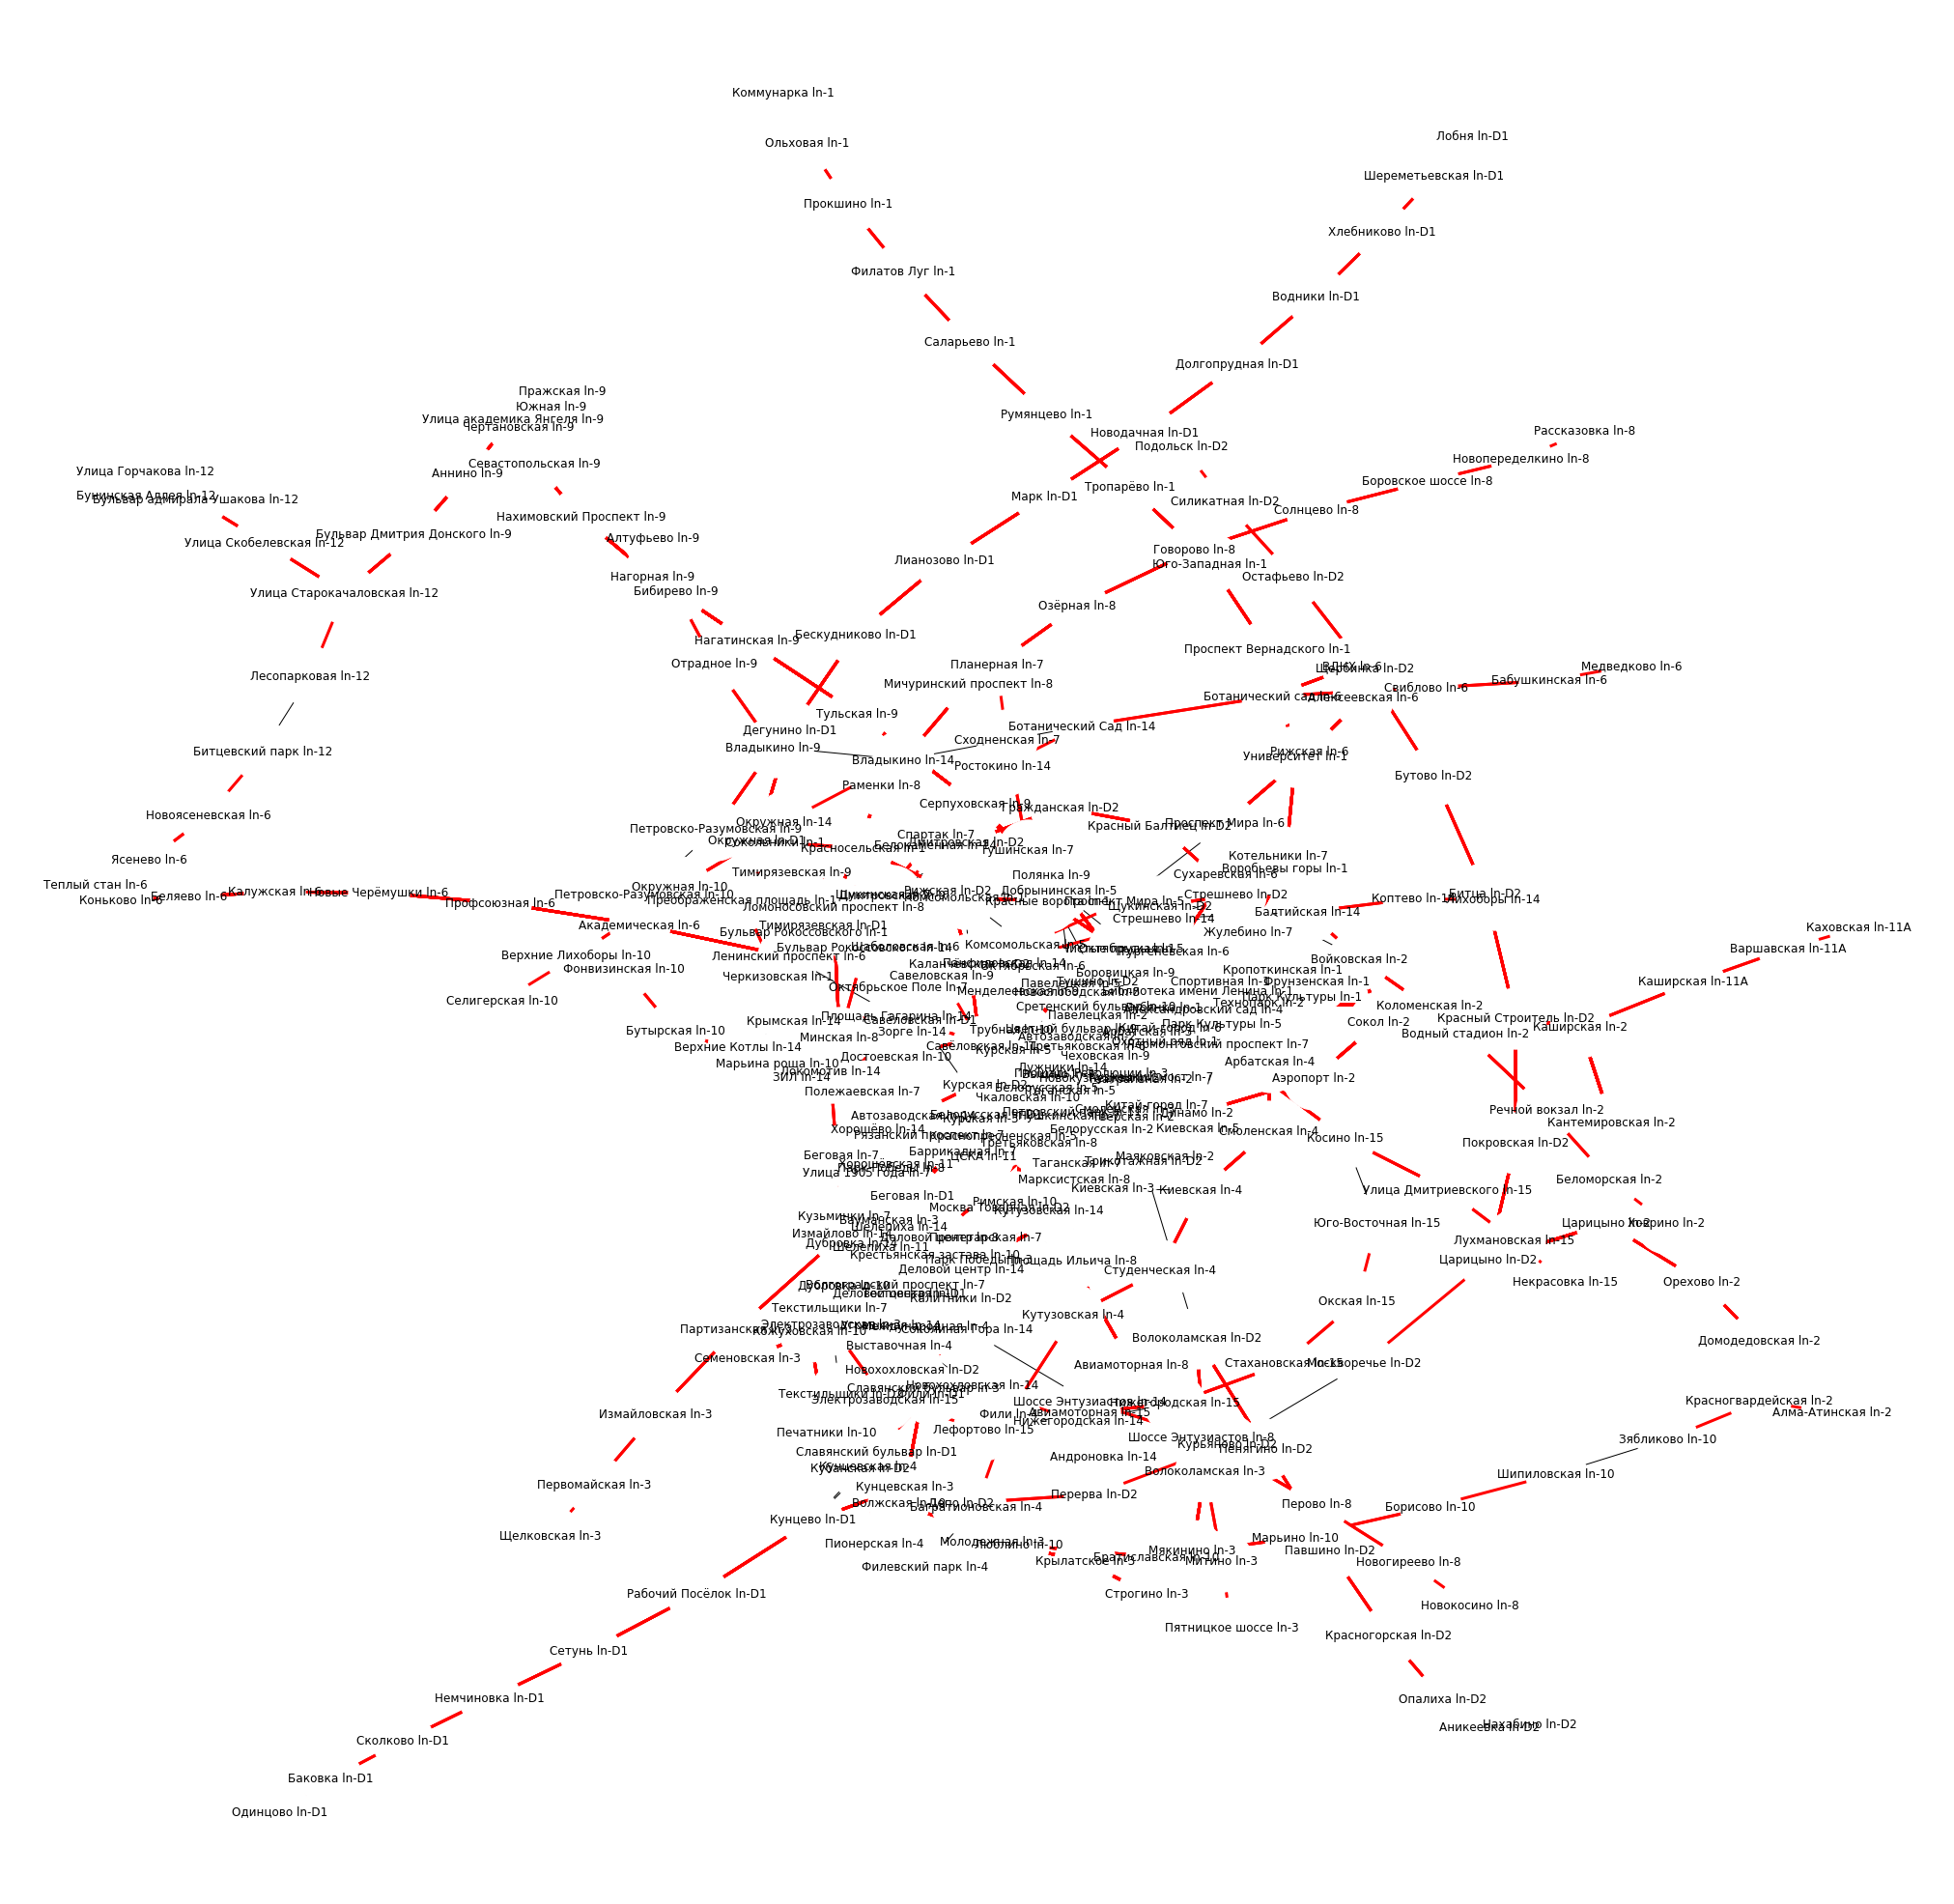

In [35]:
# Вывод кратчайших путей из одной вершины до всех остальных.
plot_paths(metro_graph, nx.single_source_shortest_path(metro_graph, 'Сокольническая_Библиотека-имени-Ленина').values())

In [ ]:
# Вывод нескольких кратчайших путей между конкретными парами вершин.
plot_paths(
    metro_graph,
    [
        nx.shortest_path(metro_graph, 'Сокольническая_Библиотека_имени_Ленина', 'Серпуховско-Тимирязевская_Алтуфьево'),
        nx.shortest_path(metro_graph, 'Сокольническая_Сокольники', 'Калужско-Рижская_Третьяковская')
    ]
)

### Bonus task: раскрашиваем граф метро
Конечно, можно нарисовать карту метро вот так:

In [ ]:
plt.figure(figsize=(16, 16)) 

nx.draw_networkx(metro_graph, with_labels=False)

А можно каждую вершину подкрасить цветом соответствующей ветки!

Для этого сначала создадим словарь с названиями цветов для каждой ветки (при желании поменяйте цвета на своё усмотрение, таблица с matplotlib'овскими цветами [тут](https://matplotlib.org/examples/color/named_colors)):

In [10]:
line_colors = {
    'Сокольническая': 'red',
    'Замоскворецкая': 'green',
    'Арбатско-Покровская': 'darkblue',
    'Филевская': 'blue',
    'Кольцевая': 'saddlebrown',
    'Калужско-Рижская': 'orangered',
    'Таганско-Краснопресненская': 'blueviolet',
    'Калининская': 'gold',
    'Серпуховско-Тимирязевская': 'gray',
    'Люблинская': 'lawngreen',
    'Каховская': 'palegreen',
    'Бутовская': 'lightsteelblue',
}

Ниже приведена функция, которая принимает название станции в формате `Имя-ветки_Имя-станции` (именно в таком формате хранятся названия в нашей таблице) и словарь вида `Имя-ветки: Цвет` (уже определённый `line_colors`). Функция возвращает цвет станции в соответствии с веткой, на которой она расположена.

In [9]:
def return_station_color(station, line_colors):
    for line in line_colors:
        if station.startswith(line):
            return line_colors[line]
    print('Something went wrong: couldn\'t find the line for station {}.\nReturn black color.'.format(station))
    return 'black'

Пример использования:

In [ ]:
return_station_color('Калининская_Третьяковская', line_colors)

In [ ]:
return_station_color('Третьяковская', line_colors)

Создайте список цветов для наших вершин.

Для этого надо в цикле пройтись по всем вершинам в `metro_graph.nodes()` и добавить в список их цвета:

In [ ]:
station_colors = []

for r in metro_graph.nodes():
    station_colors.append(return_station_color(r, line_colors))


In [ ]:
plt.figure(figsize=(16, 16)) 

# Опять же, можно поиграть со способами отрисовки.
nx.draw_networkx(metro_graph, with_labels=False, node_color=station_colors)